## Import Libraries

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error

## Read Dataset

In [9]:
df  = pd.read_csv('GoldPrice_13-23.csv')
df[:5]

,Date,Price,Open,High,Low,Vol.,Change %
0,12/30/2022,"1,826.20","1,821.80","1,832.40","1,819.80",107.50K,0.01%
1,12/29/2022,"1,826.00","1,812.30","1,827.30","1,811.20",105.99K,0.56%
2,12/28/2022,"1,815.80","1,822.40","1,822.80","1,804.20",118.08K,-0.40%
3,12/27/2022,"1,823.10","1,808.20","1,841.90","1,808.00",159.62K,0.74%
4,12/26/2022,"1,809.70","1,805.80","1,811.95","1,805.55",NaN,0.30%


## Preprocess Dataset

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2583 entries, 0 to 2582
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      2583 non-null   object
 1   Price     2583 non-null   object
 2   Open      2583 non-null   object
 3   High      2583 non-null   object
 4   Low       2583 non-null   object
 5   Vol.      2578 non-null   object
 6   Change %  2583 non-null   object
dtypes: object(7)
memory usage: 141.4+ KB


In [16]:
df = df.drop(columns=['Vol.', 'Change %'])

In [13]:
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values(by='Date', ascending=True, inplace=True)
df.reset_index(drop=True, inplace=True)

In [18]:
numCols = ['Price', 'Open', 'High', 'Low']

df[numCols] = df[numCols].replace({',': ''}, regex = True).astype('float64')

In [20]:
df, df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2583 entries, 0 to 2582
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2583 non-null   datetime64[ns]
 1   Price   2583 non-null   float64       
 2   Open    2583 non-null   float64       
 3   High    2583 non-null   float64       
 4   Low     2583 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 101.0 KB


(           Date   Price    Open     High      Low
 0    2013-01-02  1689.9  1675.8  1695.00  1672.10
 1    2013-01-03  1675.6  1688.0  1689.30  1664.30
 2    2013-01-04  1649.9  1664.4  1664.40  1630.00
 3    2013-01-07  1647.2  1657.3  1663.80  1645.30
 4    2013-01-08  1663.2  1651.5  1662.60  1648.80
 ...         ...     ...     ...      ...      ...
 2578 2022-12-26  1809.7  1805.8  1811.95  1805.55
 2579 2022-12-27  1823.1  1808.2  1841.90  1808.00
 2580 2022-12-28  1815.8  1822.4  1822.80  1804.20
 2581 2022-12-29  1826.0  1812.3  1827.30  1811.20
 2582 2022-12-30  1826.2  1821.8  1832.40  1819.80
 
 [2583 rows x 5 columns],
 None)

In [21]:
df.isnull().sum()

Date     0
Price    0
Open     0
High     0
Low      0
dtype: int64

In [25]:
df.duplicated().sum()

np.int64(0)

## Data Visualization

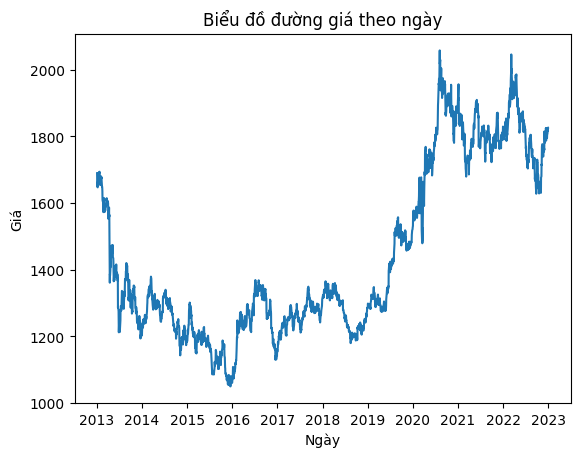

In [27]:
sns.lineplot(x=df['Date'], y=df['Price'])

plt.title('Biểu đồ đường giá theo ngày')
plt.xlabel('Ngày')
plt.ylabel('Giá')

plt.show()

In [32]:
df_test = df[df.Date.dt.year==2022]
df_train = df[df.Date.dt.year!=2022]

## Split Data

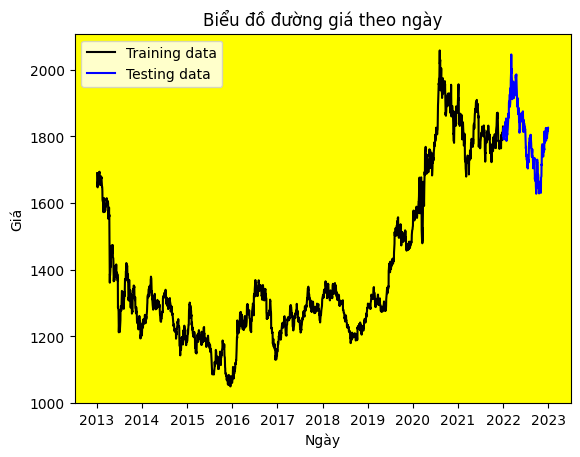

In [43]:
sns.lineplot(x=df_train['Date'], y=df_train['Price'], color =  'black', label = 'Training data')
sns.lineplot(x=df_test['Date'], y=df_test['Price'], color =  'blue', label = 'Testing data')


plt.title('Biểu đồ đường giá theo ngày')
plt.xlabel('Ngày')
plt.ylabel('Giá')
plt.gca().set_facecolor('yellow')
plt.legend()
plt.show()